In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
# Recreate a DatetimeIndex with a specific frequency

freq = 'D'  # Monthly frequency
date_rng = pd.date_range(start = start_date, end = end_date, freq = freq)

prices = np.sin(unix_dates)

data = pd.DataFrame({'ds': date_rng, 'y': prices})
data.set_index('ds', inplace = True)

In [2]:
from prophet import Prophet

In [3]:
# Разделение данных на train и test
train_size = int(0.8 * len(data))  # 80% данных для обучения
train_data = data[:train_size]
test_data = data[train_size:]

In [4]:
# Создание и обучение модели Prophet
model = Prophet(daily_seasonality=False)  # Указываем, что у нас есть ежедневная сезонность
model.fit(train_data.reset_index())

01:56:22 - cmdstanpy - INFO - Chain [1] start processing
01:56:22 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Создание фрейма для прогнозирования
future = pd.DataFrame(index=test_data.index)
future['ds'] = test_data.index

In [6]:
# Получение прогнозов
forecast = model.predict(future)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-27,-0.042987,-0.675938,0.956875,-0.042987,-0.042987,0.182604,0.182604,0.182604,-0.000509,-0.000509,-0.000509,0.183113,0.183113,0.183113,0.0,0.0,0.0,0.139617
1,2021-05-28,-0.043028,-0.663531,0.909943,-0.043028,-0.043028,0.159751,0.159751,0.159751,0.000384,0.000384,0.000384,0.159366,0.159366,0.159366,0.0,0.0,0.0,0.116722
2,2021-05-29,-0.043070,-0.744548,0.919359,-0.043070,-0.043070,0.133735,0.133735,0.133735,0.001400,0.001400,0.001400,0.132335,0.132335,0.132335,0.0,0.0,0.0,0.090665
3,2021-05-30,-0.043111,-0.693400,0.867693,-0.043111,-0.043111,0.104750,0.104750,0.104750,0.002534,0.002534,0.002534,0.102216,0.102216,0.102216,0.0,0.0,0.0,0.061639
4,2021-05-31,-0.043152,-0.776738,0.821524,-0.043152,-0.043152,0.073032,0.073032,0.073032,0.003781,0.003781,0.003781,0.069251,0.069251,0.069251,0.0,0.0,0.0,0.029880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2021-12-28,-0.051840,-0.467539,1.191920,-0.051866,-0.051813,0.423322,0.423322,0.423322,-0.004499,-0.004499,-0.004499,0.427821,0.427821,0.427821,0.0,0.0,0.0,0.371483
216,2021-12-29,-0.051881,-0.435648,1.171610,-0.051908,-0.051854,0.407294,0.407294,0.407294,-0.003093,-0.003093,-0.003093,0.410386,0.410386,0.410386,0.0,0.0,0.0,0.355413
217,2021-12-30,-0.051922,-0.502795,1.149068,-0.051949,-0.051895,0.388509,0.388509,0.388509,-0.000509,-0.000509,-0.000509,0.389017,0.389017,0.389017,0.0,0.0,0.0,0.336586
218,2021-12-31,-0.051963,-0.466584,1.095221,-0.051991,-0.051936,0.364520,0.364520,0.364520,0.000384,0.000384,0.000384,0.364135,0.364135,0.364135,0.0,0.0,0.0,0.312556


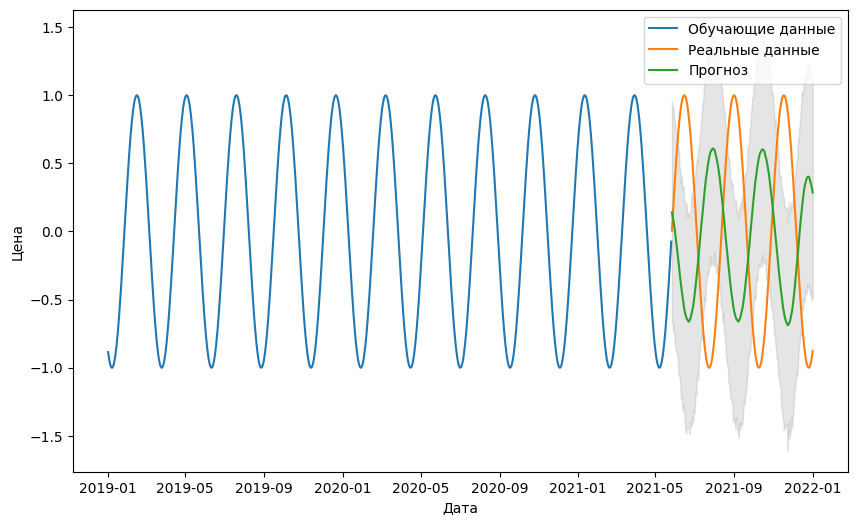

In [7]:
# Визуализация результатов
fig = plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Обучающие данные')
plt.plot(test_data.index, test_data['y'], label='Реальные данные')
plt.plot(test_data.index, forecast['yhat'], label='Прогноз')
plt.fill_between(test_data.index, forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()